In [70]:
import matplotlib.pyplot as plt
#from matplotlib.patches import Rectangle
import numpy as np
from numericalunits import e, me, c0, eps0, kB, hbar, pi
from numericalunits import J, K, GHz, T, eV, Hz

In [71]:
print(kB/J*K)

1.380649e-23


In [72]:
LNF_dict = {'LNF-LNC4_8C': {'freq': [4,5,8], 'noise': [2,1.5,2.2]},
            'LNF-LNC0.2_3A': {'freq': [0.2,0.4,3.5], 'noise': [3,1.75,2]},
            'LNF-LNC0.6_2A': {'freq': [0.6,0.8,1.9], 'noise': [2,1,1]} ,
            'LNF-LNC4_16B': {'freq': [4,6,16], 'noise': [4,3,6]},
            'LNF-LNC15_29B': {'freq': [15,17,20,22,26,29], 'noise': [12,10,6,6,10,10]},
            'LNF-LNC28_52WB': {'freq': [30,38,53], 'noise': [8,8,15]},
            'LNF-LNC65_115WB': {'freq': [60,75,80,115], 'noise': [30,30,23,30]},
            }

In [106]:
publications_dict = {'C Macklin, JTWPA (2016)': {'freq': [6], 'noise': [0.6]},
                     'Simbierowicz, JPA (2018)': {'freq': [0.6], 'noise': [0.1]},
                     'Ç Kutlu, JPA (2021)': {'freq': [2.3], 'noise': [0.12]},
                     'T Elo, JPA (2019)': {'freq': [5.3], 'noise': [0.3]},
                     'R Jang, JPA (2020)': {'freq': [6.5], 'noise': [0.35]},
}

In [107]:
freq_axis = np.linspace(0.1,120,100)*GHz
quantum_limit = (hbar*freq_axis*(2*pi)/kB)
phase2 = 27

In [108]:
endpoint = 18563.251*eV

def gamma(energy): 
    return energy/(me*c0**2) + 1
def frequency(magnetic_field):
    energy=endpoint
    return e*magnetic_field*T/(2*np.pi*me)/gamma(energy)/GHz
def magnetic_field(frequency):
    energy=endpoint
    return frequency*GHz*(2*np.pi*me)*gamma(energy)/e/T

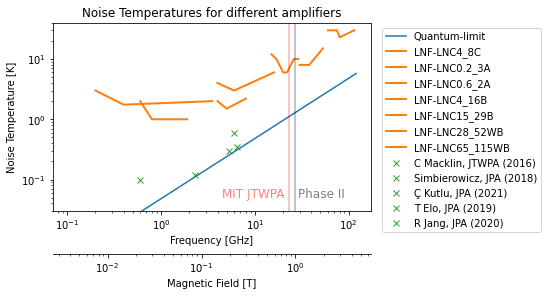

In [109]:
fig, ax = plt.subplots(figsize=(7.5,4), constrained_layout=True)


ax.plot(freq_axis/GHz, quantum_limit/K, label='Quantum-limit')
for key,amp in LNF_dict.items():
    ax.plot(amp['freq'], amp['noise'], label=key, color='C1',lw=2)

for key,amp in publications_dict.items():
    ax.plot(amp['freq'], amp['noise'], label=key, color='C2',lw=0, marker='x')


ax.set_xscale('log')
ax.set_yscale('log')
ax.axvline(x=phase2, color='k', alpha=0.3)
ax.text(28.8, 0.05, 'Phase II', size=12, color='k', alpha=0.5)
ax.axvline(x=23, color='r', alpha=0.3)
ax.text(4.5, 0.05, 'MIT JTWPA', size=12, color='r', alpha=0.5)
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel(r'Noise Temperature [K]')
ax.set_ylim(0.03,40)
ax.set_title('Noise Temperatures for different amplifiers')
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

ax2 = ax.secondary_xaxis('bottom', functions=(magnetic_field,frequency))
ax2.set_xlabel('Magnetic Field [T]')
ax2.set_xlim(ax.get_xlim())
ax2.spines['bottom'].set_position(('outward', 43))

fig.savefig('./output/amplifier_noise.pdf')

In [77]:
magnetic_field(27*GHz)
frequency(1)

27.011242316073186

In [83]:
(hbar*0.1*GHz*(2*pi)/kB)/K

0.004799243073366219